In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import ast
import copy as copylib

import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='rockmanx41024', api_key='kHxr3lIrmgvuxenvIF66')

%matplotlib inline 
%pylab inline

feedback = pd.read_csv('106 程式設計一 第一次期中考問卷調查.csv')

Populating the interactive namespace from numpy and matplotlib


In [2]:
feedback.head()


,時間戳記,您的性別：,您的學號：,您的姓名：,如果我盡力去做的話，我總是能夠解決難題的,即使別人反對我，我仍然想辦法達到我所要的目標,對我來說，堅持理想和達成目標是輕而易舉的,我自信能有效地應付任何突如其來的事情,以我的才智，我定能應付意料之外的情況,如果我付出必要的努力，我一定能解決大多數的難題,...,我覺得程式設計這門課：,我覺得程式設計是有趣的,我覺得程式設計在資管系的課程中是重要的,我在這堂課中”希望“拿到的分數,此次考試的手寫題部分我覺得,此次考試的選擇題與填充題部分我覺得,整體而言，對於這次考試我是有信心的,我覺得熟讀課程講義有助於準備此次考試,我覺得熟讀課後練習(lab)與作業有助於準備此次考試,此次考試我覺得最困難的部分在於（可能是時間不夠用、英文敘述不好懂、或是手寫程式碼太難......請試著描述你覺得最困難的地方）
0,2017/10/23 12:47:33 下午 GMT+8,男,106306028,郭丞堯,4,4,3,4,3,5,...,3,4,4,90分以上,4,5,4,3,5,NaN
1,2017/10/23 1:15:17 下午 GMT+8,男,106306054,洪浩晟,5,6,4,4,4,5,...,3,5,5,90分以上,3,4,3,5,5,忘記java doc格式
2,2017/10/23 1:19:43 下午 GMT+8,男,106306019,洪濬中,6,6,4,4,5,6,...,4,4,4,80~90分,4,3,2,4,5,NaN
3,2017/10/23 2:11:30 下午 GMT+8,女,105303021,王奕涵,4,5,3,2,3,4,...,4,4,3,80~90分,4,4,1,5,4,NaN
4,2017/10/23 2:18:45 下午 GMT+8,男,106306006,謝秉峻,3,3,3,3,3,3,...,4,3,4,80~90分,3,3,3,3,4,java doc


In [13]:
questionList = [
    "您的學號：",
    "如果我盡力去做的話，我總是能夠解決難題的",
    "即使別人反對我，我仍然想辦法達到我所要的目標",
    "對我來說，堅持理想和達成目標是輕而易舉的",
    "我自信能有效地應付任何突如其來的事情",
    "以我的才智，我定能應付意料之外的情況",
    "如果我付出必要的努力，我一定能解決大多數的難題",
    "我能冷靜地面對困難，因為我相信自己處理問題的能力",
    "面對一個難題時，我通常能找到幾個解決方法",
    "有麻煩的時候，我通常能想到一些應付的方法",
    "無論什麼事在我身上發生，我能夠應付自如",
]
df_GSE = feedback[questionList]
df_GSE

,您的學號：,如果我盡力去做的話，我總是能夠解決難題的,即使別人反對我，我仍然想辦法達到我所要的目標,對我來說，堅持理想和達成目標是輕而易舉的,我自信能有效地應付任何突如其來的事情,以我的才智，我定能應付意料之外的情況,如果我付出必要的努力，我一定能解決大多數的難題,我能冷靜地面對困難，因為我相信自己處理問題的能力,面對一個難題時，我通常能找到幾個解決方法,有麻煩的時候，我通常能想到一些應付的方法,無論什麼事在我身上發生，我能夠應付自如
0,106306028,4,4,3,4,3,5,5,3,3,4
1,106306054,5,6,4,4,4,5,5,5,5,4
2,106306019,6,6,4,4,5,6,6,5,5,5
3,105303021,4,5,3,2,3,4,2,3,3,3
4,106306006,3,3,3,3,3,3,3,3,3,3
5,106306090,4,4,3,3,3,5,4,4,4,3
6,103209045,5,5,4,4,5,5,5,5,5,4
7,106306069,2,3,2,2,2,2,3,2,2,2
8,106306083,4,4,4,4,4,4,4,4,3,4
9,104302010,6,4,5,6,6,6,6,4,5,4


In [18]:
df_GSE['total'] = df_GSE.sum(axis=1)
df_GSE

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,您的學號：,如果我盡力去做的話，我總是能夠解決難題的,即使別人反對我，我仍然想辦法達到我所要的目標,對我來說，堅持理想和達成目標是輕而易舉的,我自信能有效地應付任何突如其來的事情,以我的才智，我定能應付意料之外的情況,如果我付出必要的努力，我一定能解決大多數的難題,我能冷靜地面對困難，因為我相信自己處理問題的能力,面對一個難題時，我通常能找到幾個解決方法,有麻煩的時候，我通常能想到一些應付的方法,無論什麼事在我身上發生，我能夠應付自如,total
0,106306028,4,4,3,4,3,5,5,3,3,4,114
1,106306054,5,6,4,4,4,5,5,5,5,4,141
2,106306019,6,6,4,4,5,6,6,5,5,5,156
3,105303021,4,5,3,2,3,4,2,3,3,3,96
4,106306006,3,3,3,3,3,3,3,3,3,3,90
5,106306090,4,4,3,3,3,5,4,4,4,3,111
6,103209045,5,5,4,4,5,5,5,5,5,4,141
7,106306069,2,3,2,2,2,2,3,2,2,2,66
8,106306083,4,4,4,4,4,4,4,4,3,4,117
9,104302010,6,4,5,6,6,6,6,4,5,4,156


In [27]:
df_GSE['total'].mean()

122.44186046511628

In [28]:
df_GSE['total'].std()

25.73813651979544

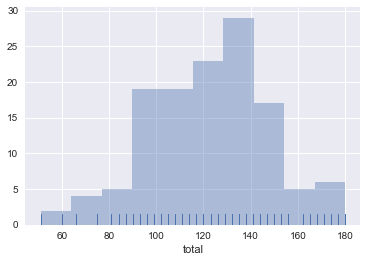

In [26]:
sns.distplot(df_GSE['total'], rug=True, kde=False);

In [51]:
questionList = [
    "您的學號：",
    "我覺得程式設計這門課：",
    "我覺得程式設計是有趣的",
    "我覺得程式設計在資管系的課程中是重要的",
    "我在這堂課中”希望“拿到的分數",
]
df_expectation = feedback[questionList]
df_expectation


,您的學號：,我覺得程式設計這門課：,我覺得程式設計是有趣的,我覺得程式設計在資管系的課程中是重要的,我在這堂課中”希望“拿到的分數
0,106306028,3,4,4,90分以上
1,106306054,3,5,5,90分以上
2,106306019,4,4,4,80~90分
3,105303021,4,4,3,80~90分
4,106306006,4,3,4,80~90分
5,106306090,5,3,5,80~90分
6,103209045,4,4,5,90分以上
7,106306069,3,4,5,90分以上
8,106306083,3,3,5,90分以上
9,104302010,4,5,5,90分以上


In [52]:
df_expectation

,您的學號：,我覺得程式設計這門課：,我覺得程式設計是有趣的,我覺得程式設計在資管系的課程中是重要的,我在這堂課中”希望“拿到的分數
0,106306028,3,4,4,90分以上
1,106306054,3,5,5,90分以上
2,106306019,4,4,4,80~90分
3,105303021,4,4,3,80~90分
4,106306006,4,3,4,80~90分
5,106306090,5,3,5,80~90分
6,103209045,4,4,5,90分以上
7,106306069,3,4,5,90分以上
8,106306083,3,3,5,90分以上
9,104302010,4,5,5,90分以上


In [66]:
cols_to_transform = [ '我在這堂課中”希望“拿到的分數' ]
df_with_dummies = pd.get_dummies(df_expectation, columns = cols_to_transform )

In [67]:
df_with_dummies

,您的學號：,我覺得程式設計這門課：,我覺得程式設計是有趣的,我覺得程式設計在資管系的課程中是重要的,我在這堂課中”希望“拿到的分數_60~80分,我在這堂課中”希望“拿到的分數_80~90分,我在這堂課中”希望“拿到的分數_90分以上
0,106306028,3,4,4,0,0,1
1,106306054,3,5,5,0,0,1
2,106306019,4,4,4,0,1,0
3,105303021,4,4,3,0,1,0
4,106306006,4,3,4,0,1,0
5,106306090,5,3,5,0,1,0
6,103209045,4,4,5,0,0,1
7,106306069,3,4,5,0,0,1
8,106306083,3,3,5,0,0,1
9,104302010,4,5,5,0,0,1


In [68]:
df_with_dummies['我在這堂課中”希望“拿到的分數_90分以上'] = df_with_dummies['我在這堂課中”希望“拿到的分數_90分以上'].apply(lambda x: x*3)
df_with_dummies['我在這堂課中”希望“拿到的分數_80~90分'] = df_with_dummies['我在這堂課中”希望“拿到的分數_80~90分'].apply(lambda x: x*2)
df_with_dummies['我在這堂課中”希望“拿到的分數_60~80分'] = df_with_dummies['我在這堂課中”希望“拿到的分數_60~80分'].apply(lambda x: x*-1)
df_with_dummies['我覺得程式設計這門課：'] = df_with_dummies['我覺得程式設計這門課：'].apply(lambda x: x*-2)

In [69]:
df_with_dummies['total'] = df_with_dummies.sum(axis=1)

In [70]:
df_with_dummies

,您的學號：,我覺得程式設計這門課：,我覺得程式設計是有趣的,我覺得程式設計在資管系的課程中是重要的,我在這堂課中”希望“拿到的分數_60~80分,我在這堂課中”希望“拿到的分數_80~90分,我在這堂課中”希望“拿到的分數_90分以上,total
0,106306028,-6,4,4,0,0,3,5
1,106306054,-6,5,5,0,0,3,7
2,106306019,-8,4,4,0,2,0,2
3,105303021,-8,4,3,0,2,0,1
4,106306006,-8,3,4,0,2,0,1
5,106306090,-10,3,5,0,2,0,0
6,103209045,-8,4,5,0,0,3,4
7,106306069,-6,4,5,0,0,3,6
8,106306083,-6,3,5,0,0,3,5
9,104302010,-8,5,5,0,0,3,5


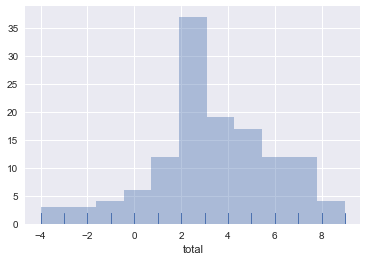

In [71]:
sns.distplot(df_GSE['total'], rug=True, kde=False);

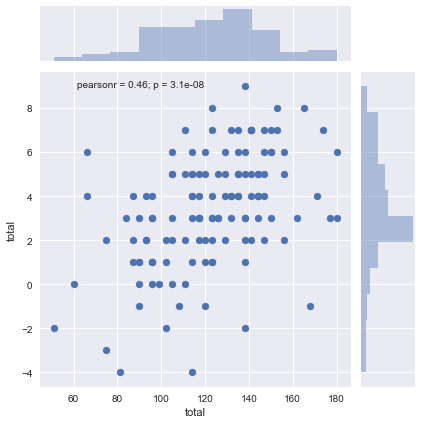

In [73]:
sns.jointplot(x=df_GSE['total'], y=df_with_dummies['total']);

In [ ]:
# 自我效能評估 找離群值，maybe 覺得程式很難的人，或是對自己這堂課的分數期望比較不高的
# 看一下他們的考試跟 pretest 的表現